In [6]:
# As you examine the data, you are overcome with a creeping suspicion that the dataset is fake. You surmise that your boss handed you spurious data in order to test the data engineering skills of a new employee. To confirm your hunch, you decide to take the following steps to generate a visualization of the data, with which you will confront your boss:

# Import the SQL database into Pandas. (Yes, you could read the CSVs directly in Pandas, but you are, after all, trying to prove your technical mettle.) This step may require some research. Feel free to use the code below to get started. Be sure to make any necessary modifications for your username, password, host, port, and database name:
# from sqlalchemy import create_engine
# engine = create_engine('postgresql://localhost:5432/<your_db_name>')
# connection = engine.connect()

# Consult SQLAlchemy documentation for more information.

# If using a password, do not upload your password to your GitHub repository. See https://www.youtube.com/watch?v=2uaTPmNvH0I and https://help.github.com/en/github/using-git/ignoring-files for more information.

# Create a histogram to visualize the most common salary ranges for employees.

# Create a bar chart of average salary by title.

In [1]:
# import all dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from pw_keys import site

In [2]:

# Create the engine and connection to the postgresql database
engine = create_engine(site)
connection = engine.connect()

In [3]:
# read the employee salaries table from database and set as a dataframe
emp_salaries_df = pd.read_sql("select * from salaries", connection)
emp_salaries_df.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


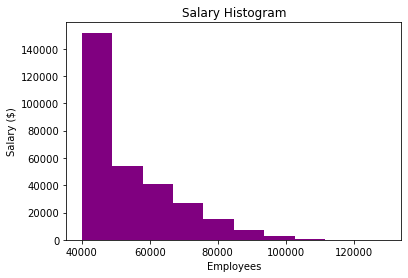

In [5]:
# Create a histogram to visualize the most common salary ranges for employees
emp_salaries_df['salary'].plot(kind='hist', color='purple')
plt.title('Salary Histogram')
plt.xlabel('Employees')
plt.ylabel('Salary ($)')
plt.show()

In [8]:
# import titles and employees tables from db
titles_df = pd.read_sql('select * from titles', connection)
emp_df = pd.read_sql('select * from employees', connection)

In [10]:
titles_df.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [11]:
emp_df.head()

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [14]:
# merge title and employee dataframes to include title id and staff title
emp_merged = pd.merge(titles_df, emp_df, how = "inner", left_on = 'title_id', right_on = 'emp_title')
emp_merged.head()

,title_id,title,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date
0,s0001,Staff,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,s0001,Staff,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
2,s0001,Staff,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28
3,s0001,Staff,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25
4,s0001,Staff,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28


In [18]:
# merge salary information in the emp_merged dataframe to include salary information
salary_merge = pd.merge(emp_merged, emp_salaries_df, how='inner', on='emp_no' )
salary_merge.head()

,title_id,title,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date,salary
0,s0001,Staff,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000
1,s0001,Staff,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000
2,s0001,Staff,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,56087
3,s0001,Staff,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,87084
4,s0001,Staff,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,63016


In [22]:
# create a groupby object and use the aggregate function 'mean' to find the average salary by title
salaries_grouped = salary_merge.groupby('title')['salary'].mean()
salaries_grouped

title
Assistant Engineer    48564.434447
Engineer              48535.336511
Manager               51531.041667
Senior Engineer       48506.799871
Senior Staff          58550.172704
Staff                 58465.382850
Technique Leader      48582.896092
Name: salary, dtype: float64

Text(0, 0.5, 'Average Salary ($)')

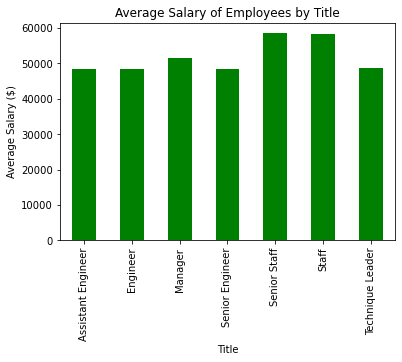

In [26]:
# plot the list to show the average salary by job title
salaries_grouped.plot(kind='bar', color='green')
plt.title('Average Salary of Employees by Title')
plt.xlabel('Title')
plt.ylabel('Average Salary ($)')